In [55]:
# libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn import datasets

# libraries for visualization
from plotnine import *
import matplotlib.pyplot as plt

# helper functions
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline

# support vector classifier (used for support vector machines and maximal margin classifiers as well)
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


Let's first create a data set that's linearly separable with 2 classes. We will use the make_blobs function.

In [2]:
# cluster_std is how far the data points spread out from the center
X, y = datasets.make_blobs(
    n_samples=50, centers=2, cluster_std=1, random_state=42
)

Let's convert our arrays into a single dataframe for visualization

In [3]:
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'label':y})

We will follow the usual modeling process:
- Visualize and explore data
- Initialize model 
- Fit model with training data
- Assess model performance

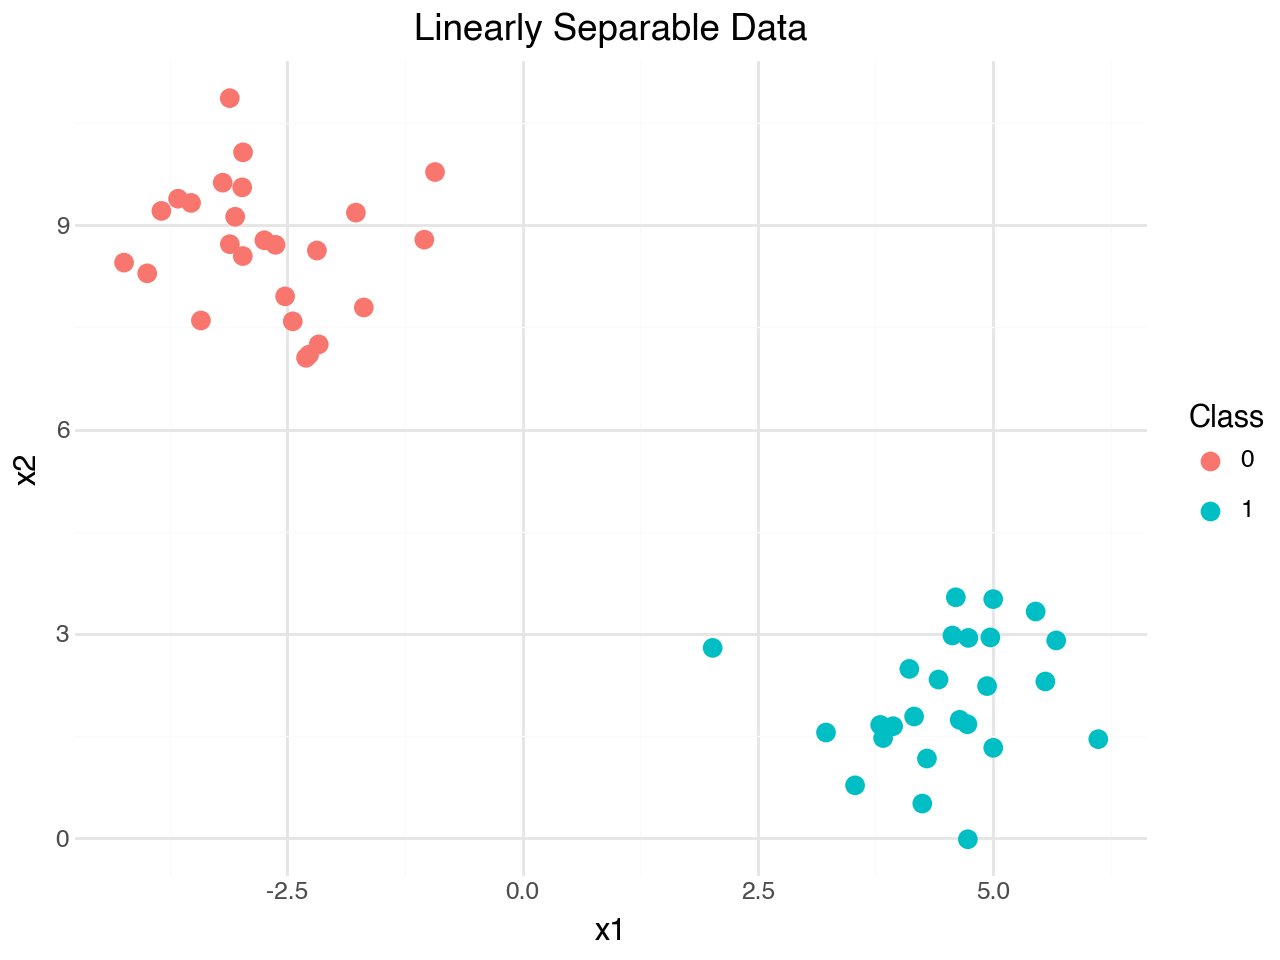

In [4]:
(
    ggplot(df, aes("x1", "x2", color="factor(label)")) +
    geom_point(size=3) +
    theme_minimal() +
    labs(title="Linearly Separable Data", color="Class")
)

Maximal Marginal Classifiers are not available in scikit-learn. We will use SVC (Support Vector Classifier) function call to imitate a Hard-Margin Classifier. 

In [5]:
# initialize hard-margin Maximal Marginal Classifier
# we will do so by making C be a large value. Large C = model is strict and penalizes misclassification severely.
mmc = SVC(kernel="linear",C=1e6)

In [6]:
# fit model
mmc.fit(X,y)


,C,1000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
# this function is designed to visualize the hyperplane in 2D

def show_hyperplane(model,X,data):
  # generate grid
  xx, yy = np.meshgrid(
      np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
      np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
  )
  # for each x,y combination, predict the class
  Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # create dataframe for grid
  df_grid = pd.DataFrame(dict(
      x1=xx.ravel(),
      x2=yy.ravel(),
      decision=Z.ravel(),
      class_pred=model.predict(np.c_[xx.ravel(), yy.ravel()])
  ))

  # create plot using grid
  p = (
      ggplot(data, aes("x1", "x2")) +
      geom_tile(df_grid, aes("x1", "x2", fill="factor(class_pred)"), alpha=0.2) +
      geom_point(aes(color="factor(label)"), size=3) +
      geom_point(pd.DataFrame(model.support_vectors_, columns=["x1","x2"]),
                aes("x1", "x2"), shape="o", size=5, fill="none", color="black") +
      theme_538() +
      labs(title="Hyperplane Based Decision Boundary",
          color="True Class", fill="Predicted Class")
  )

  return p



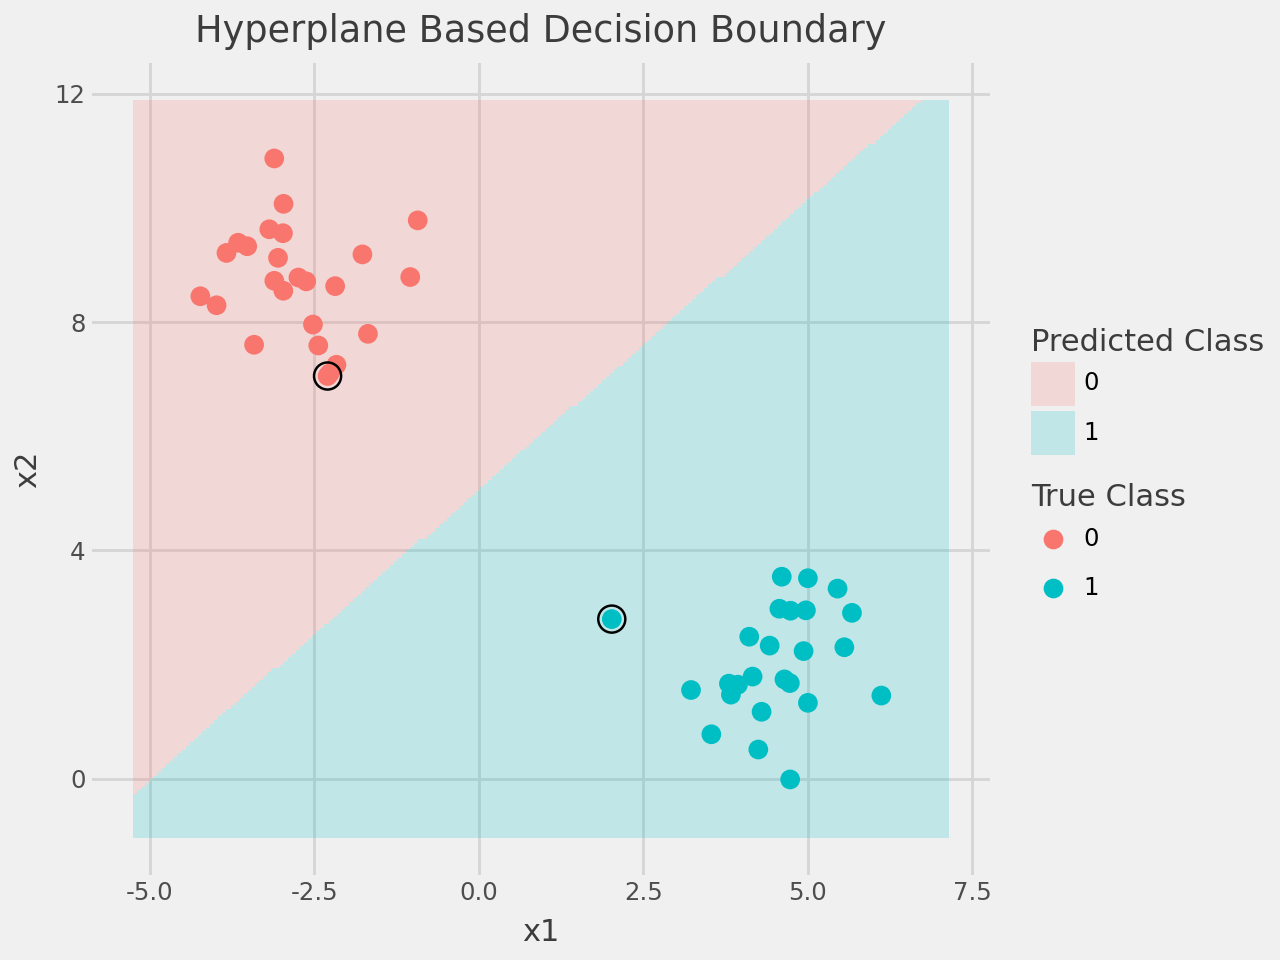

In [8]:
show_hyperplane(mmc,X,df)

Let's try again but this time with a more complex data set where the classes are not linearly separable

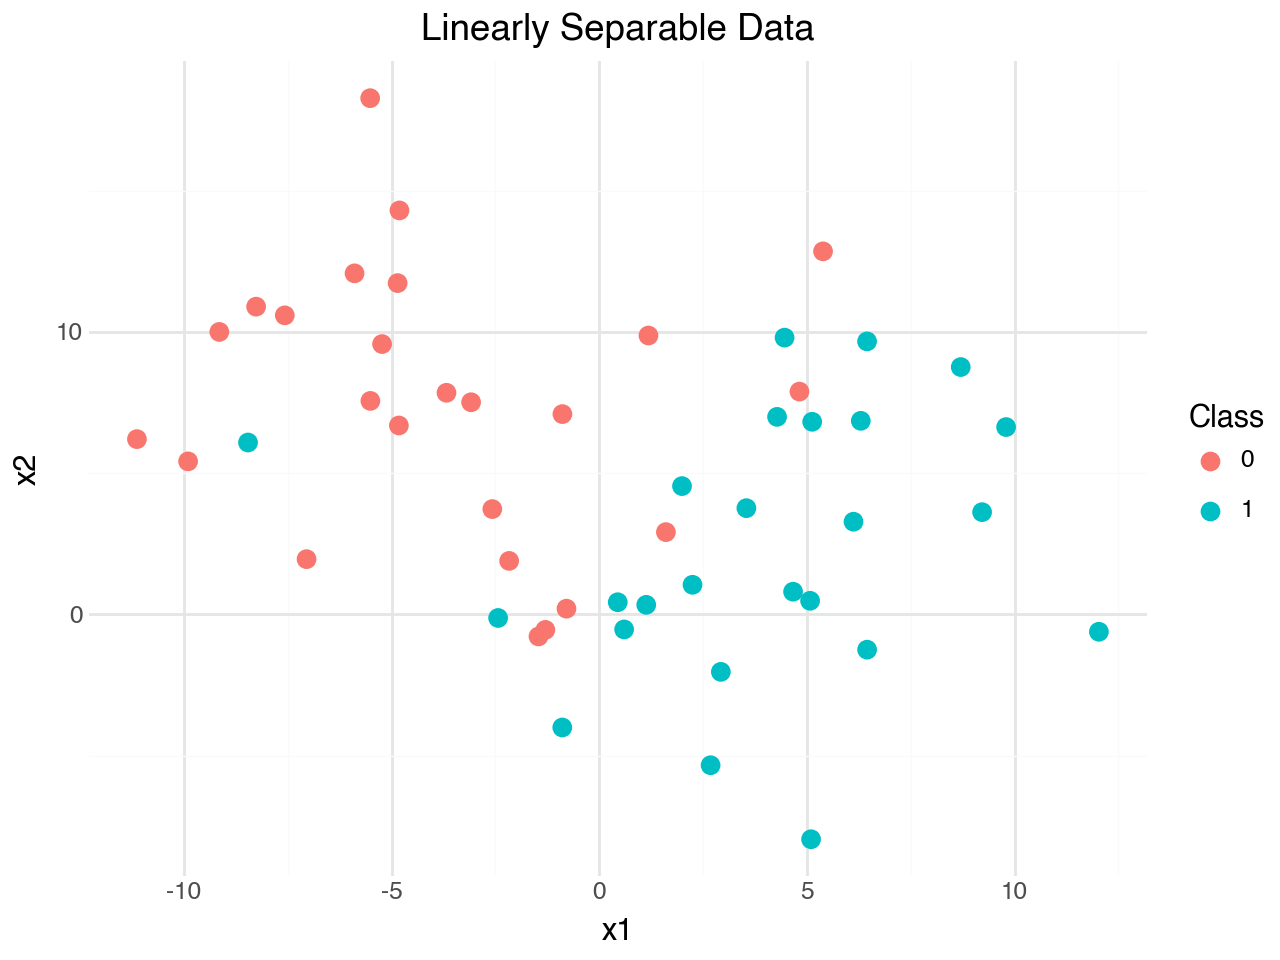

In [9]:
# prepare data
X, y = datasets.make_blobs(
    n_samples=50, centers=2, cluster_std=5, random_state=42
)

df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'label':y})

# visualize data
(
    ggplot(df, aes("x1", "x2", color="factor(label)")) +
    geom_point(size=3) +
    theme_minimal() +
    labs(title="Linearly Separable Data", color="Class")
)

Training Accuracy: 0.825
Testing Accuracy: 0.9
Test ROC AUC: 1.0


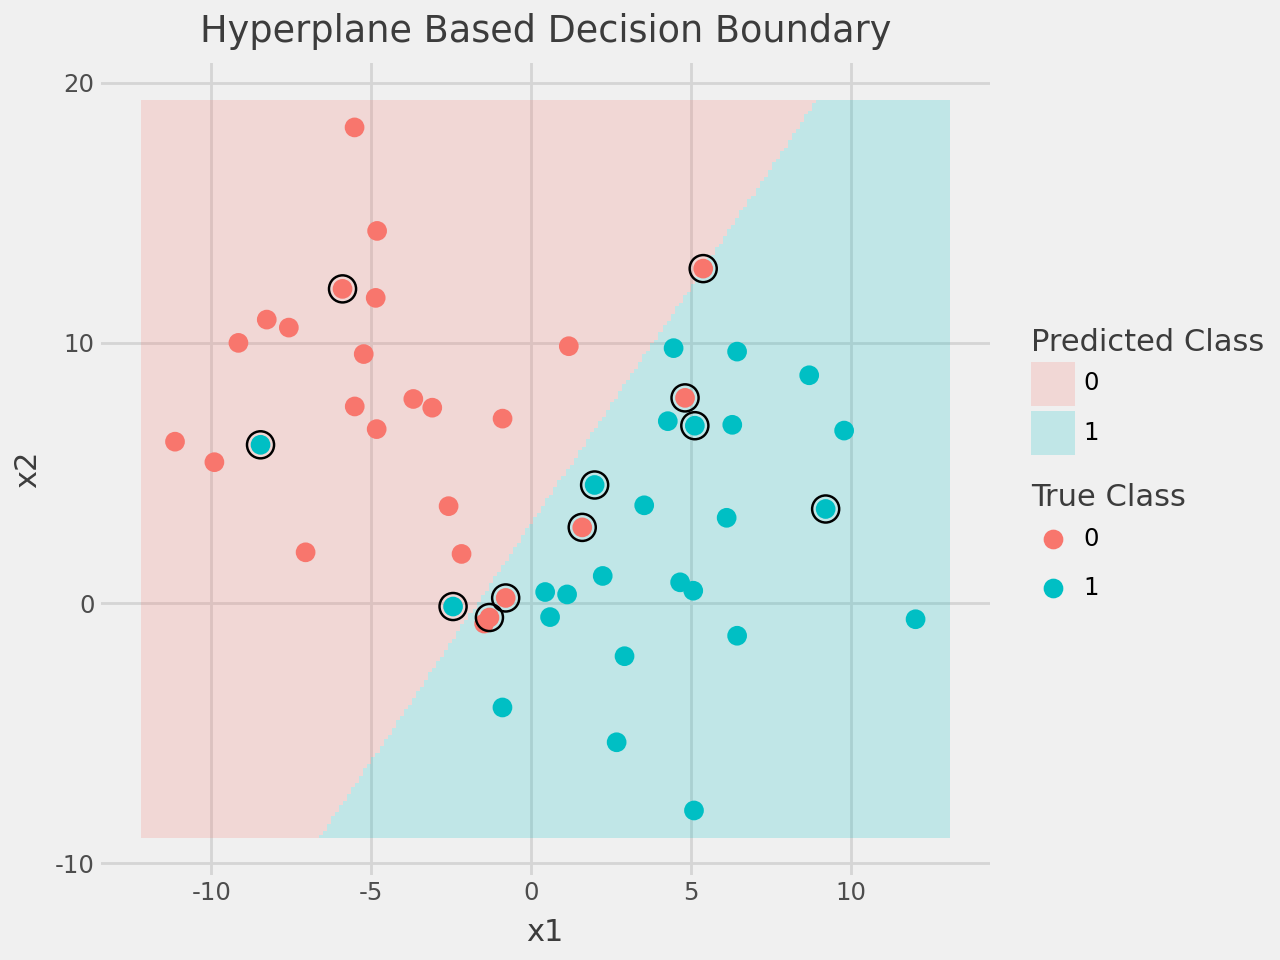

In [ ]:
# initialize model
svc = SVC(kernel='linear',C=1e6)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit data to model
svc.fit(X_train,y_train)

# evaluate model
print("Training Accuracy:",svc.score(X_train,y_train))
print("Testing Accuracy:",svc.score(X_test,y_test))

# decision_function gives distance from hyperplane (used for ROC AUC calculation)
y_test_pred = svc.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_test_pred)
print("Test ROC AUC:",roc_auc)

# visualize model
show_hyperplane(svc,X,df)

Training Accuracy: 0.85
Testing Accuracy: 0.9
Test ROC AUC: 1.0


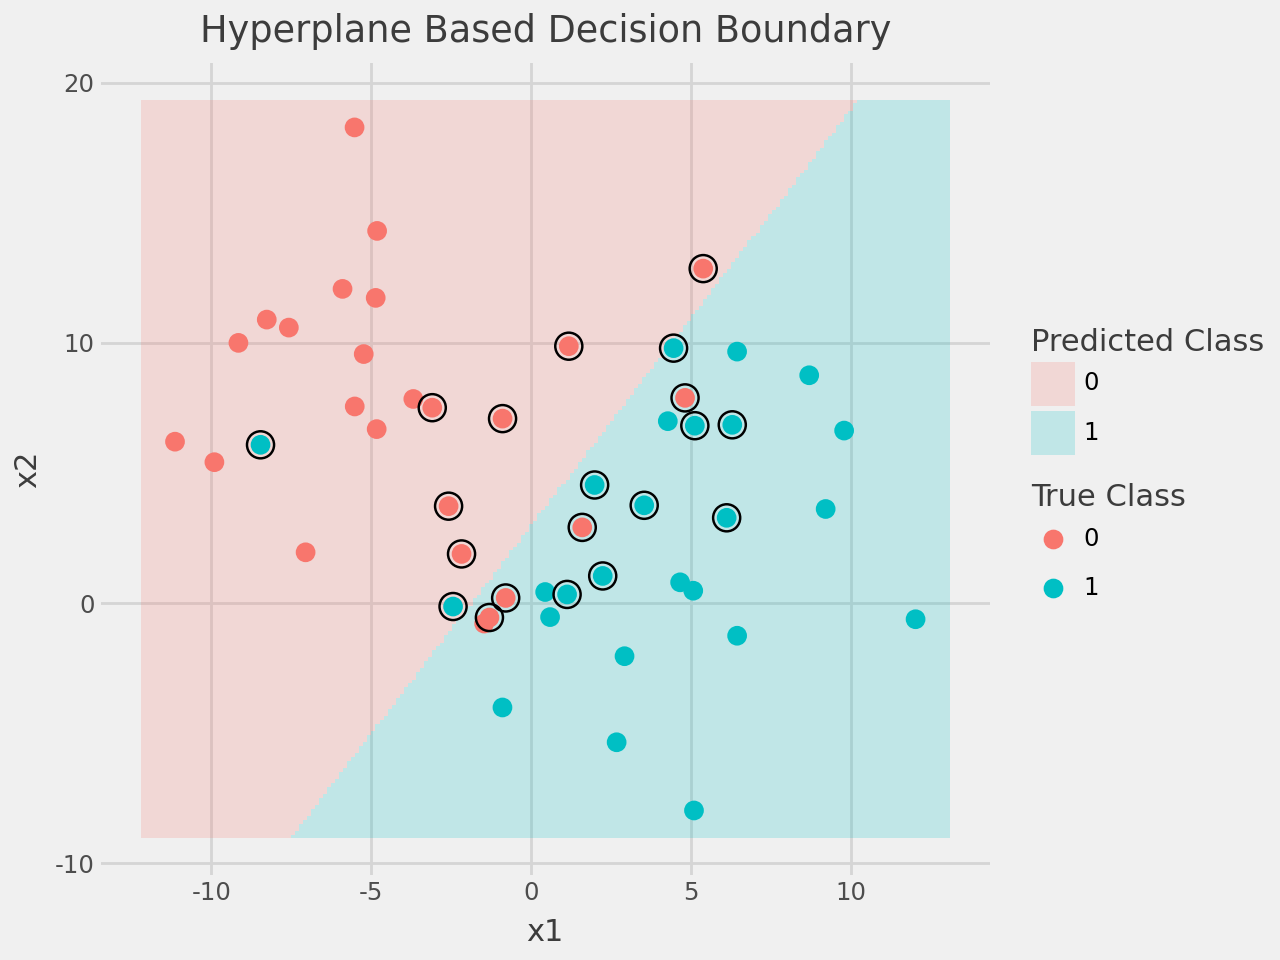

In [ ]:
# initialize model
svc = SVC(kernel='linear',C=0.01)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit data to model
svc.fit(X_train,y_train)

# evaluate model
print("Training Accuracy:",svc.score(X_train,y_train))
print("Testing Accuracy:",svc.score(X_test,y_test))

y_test_pred = svc.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_test_pred)
print("Test ROC AUC:",roc_auc)

# visualize model
show_hyperplane(svc,X,df)

Training Accuracy: 0.75
Testing Accuracy: 0.9
Test ROC AUC: 0.8095238095238095


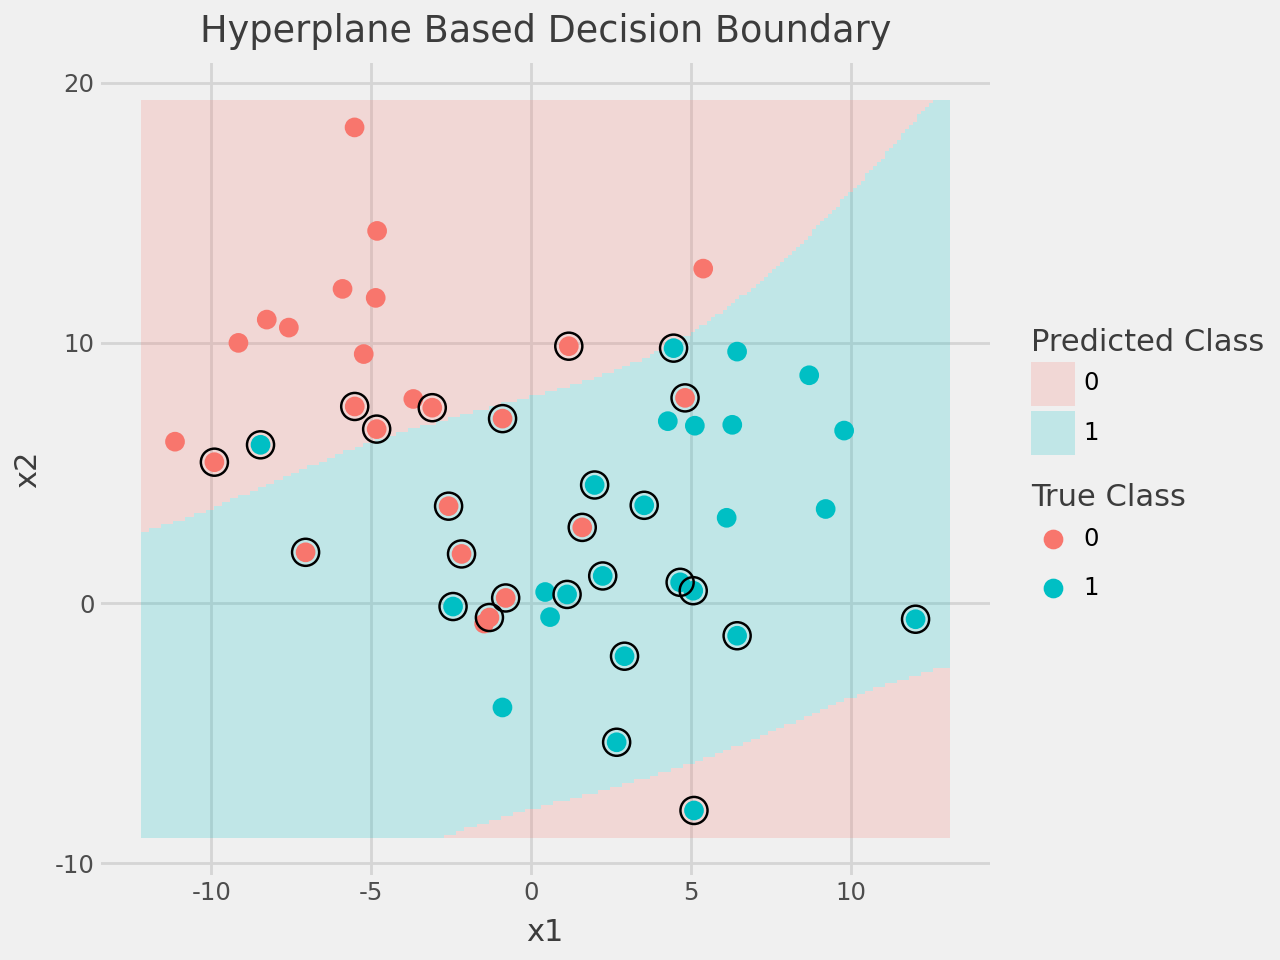

In [ ]:
# initialize model
svm = SVC(kernel='poly',C=1,degree=4)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit data to model
svm.fit(X_train,y_train)

# evaluate model
print("Training Accuracy:",svm.score(X_train,y_train))
print("Testing Accuracy:",svm.score(X_test,y_test))

y_test_pred = svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_test_pred)
print("Test ROC AUC:",roc_auc)

# visualize model
show_hyperplane(svm,X,df)

Let's now use a dataset where even a polynomial kernel SVM may not be applicable.

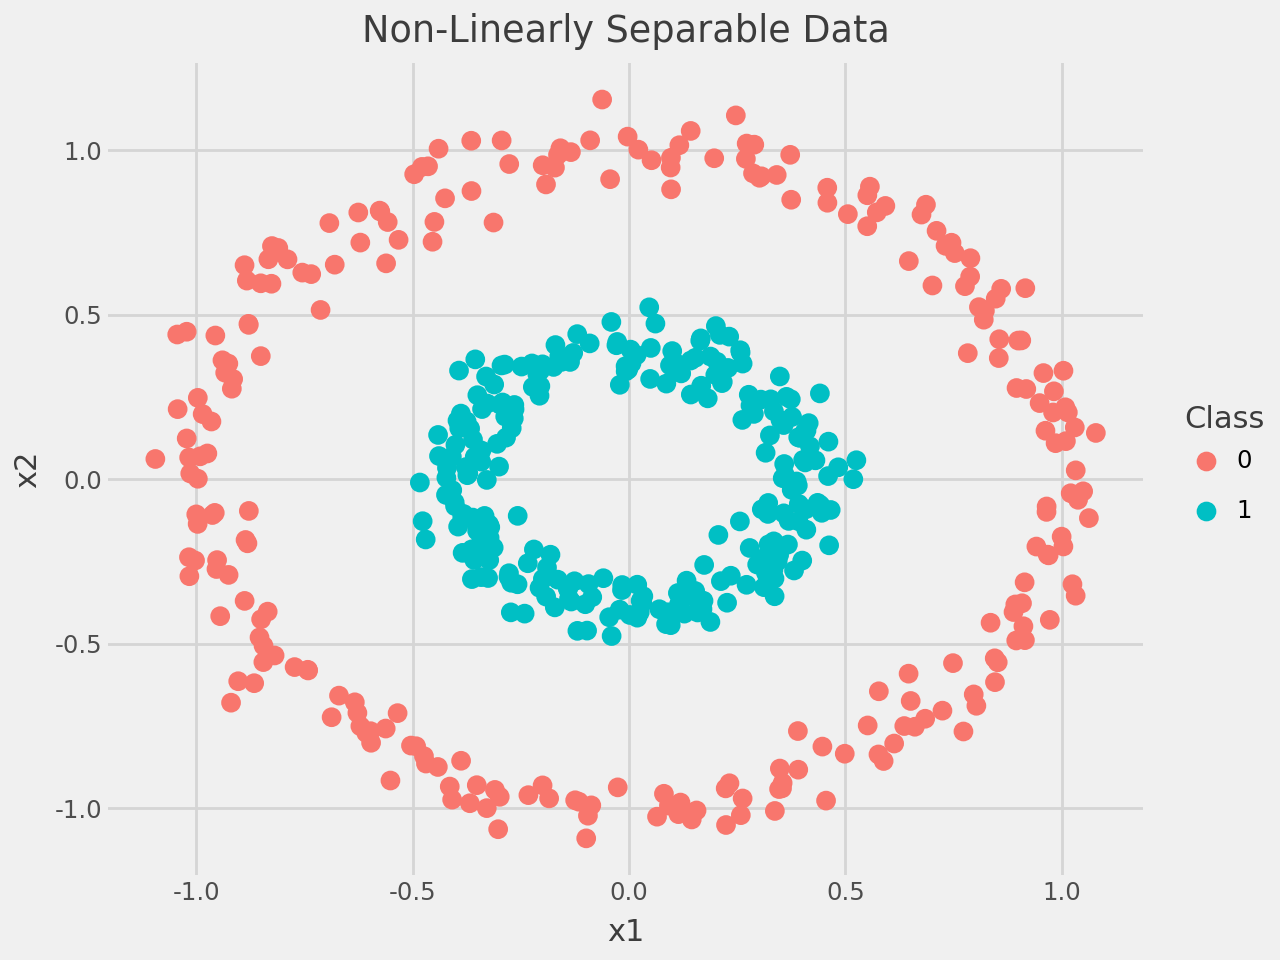

In [13]:
# prepare data
X, y = datasets.make_circles(n_samples=500, factor=0.4, noise=0.05, random_state=42)

df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'label':y})

# visualize data
(
    ggplot(df, aes("x1", "x2", color="factor(label)")) +
    geom_point(size=3) +
    theme_538() +
    labs(title="Non-Linearly Separable Data", color="Class")
)

Training Accuracy: 0.5175
Testing Accuracy: 0.43
Test ROC AUC: 0.42309261525907793


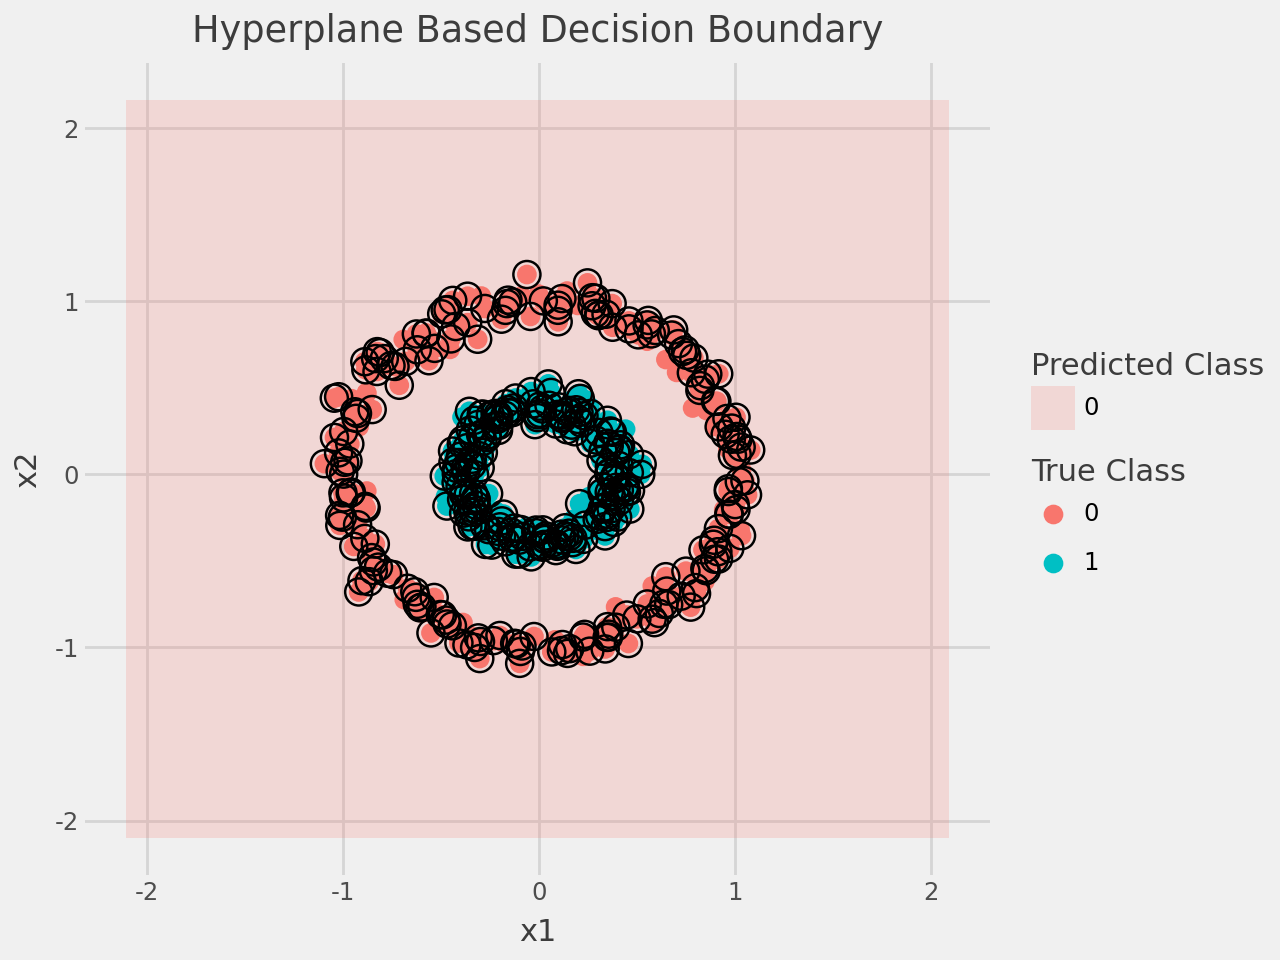

In [ ]:
# initialize model
svm = SVC(kernel='poly',degree=3,C=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit data to model
svm.fit(X_train,y_train)

# evaluate model
print("Training Accuracy:",svm.score(X_train,y_train))
print("Testing Accuracy:",svm.score(X_test,y_test))

y_test_pred = svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_test_pred)
print("Test ROC AUC:",roc_auc)

# visualize model
show_hyperplane(svm,X,df)

Let's now try a Radial Basis Function (RBF) Kernel function. 

Training Accuracy: 1.0
Testing Accuracy: 1.0
Test ROC AUC: 1.0


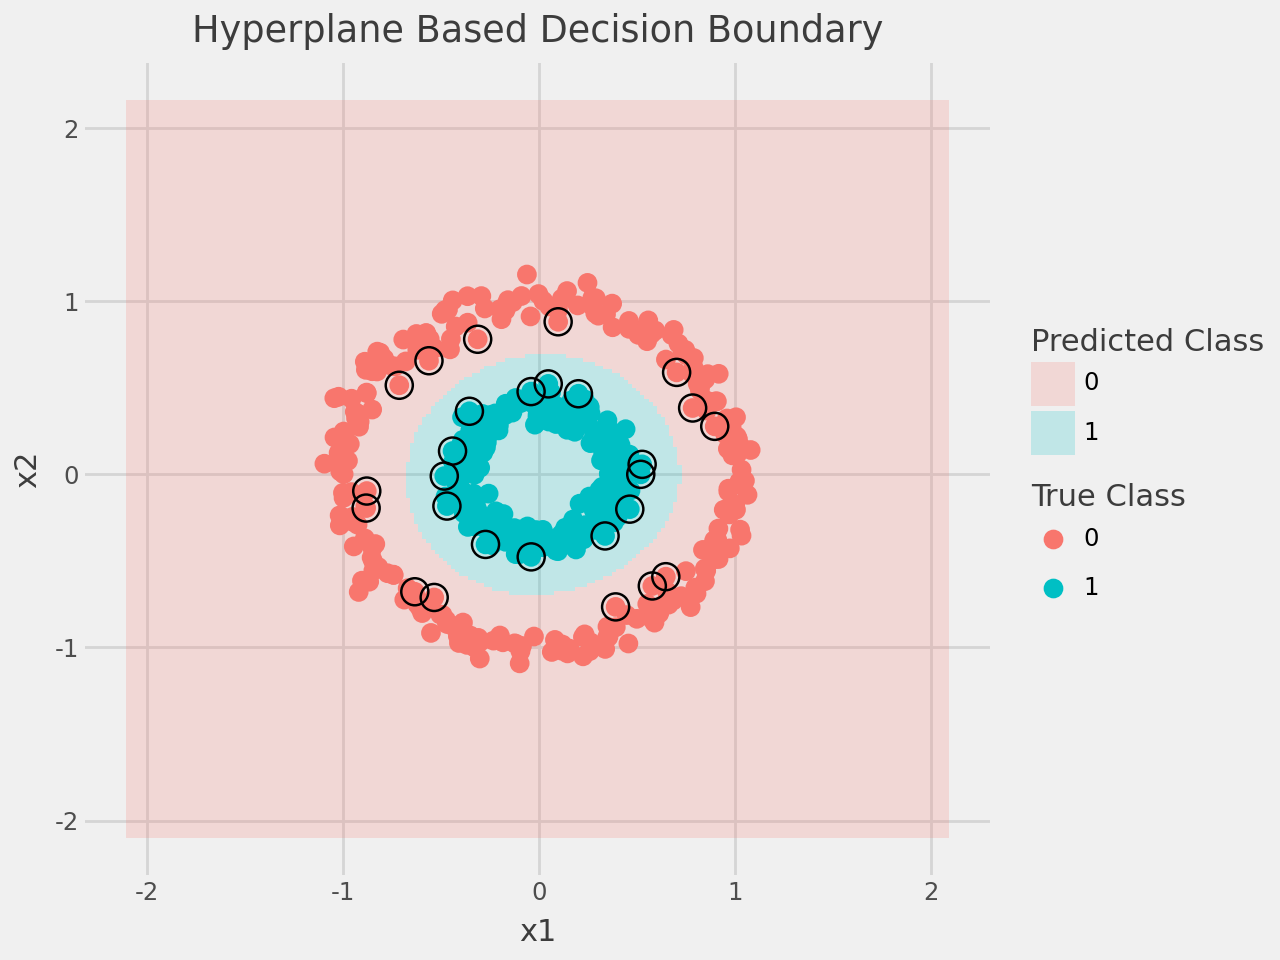

In [ ]:
# initialize model
svm = SVC(kernel='rbf',gamma=1,C=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit data to model
svm.fit(X_train,y_train)

# evaluate model
print("Training Accuracy:",svm.score(X_train,y_train))
print("Testing Accuracy:",svm.score(X_test,y_test))

y_test_pred = svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_test_pred)
print("Test ROC AUC:",roc_auc)

# visualize model
show_hyperplane(svm,X,df)

Hyperparameters in scikit-learn for Support Vector Machines:
- gamma: scales amount of influence between two observations (larger value of gamma means smaller influence)
- coef0: this is the r variable in the Polynomial Kernel function
- degree: degree of the Polynomial Kernel, determines the higher-dimensional space the observations map to using the kernel trick


Let's bring in another non-linearly separable data. The features first need to be standard scaled (Z-scored). We will use sklearn's Pipelines to standard scale and fit the SVM. 

         x1        x2 label
0 -2.356971 -4.618188     a
1 -1.257146  1.281729     a
2 -1.557418 -1.953961     a
3 -2.009731 -0.000805     a
4 -2.798693  4.154555     a


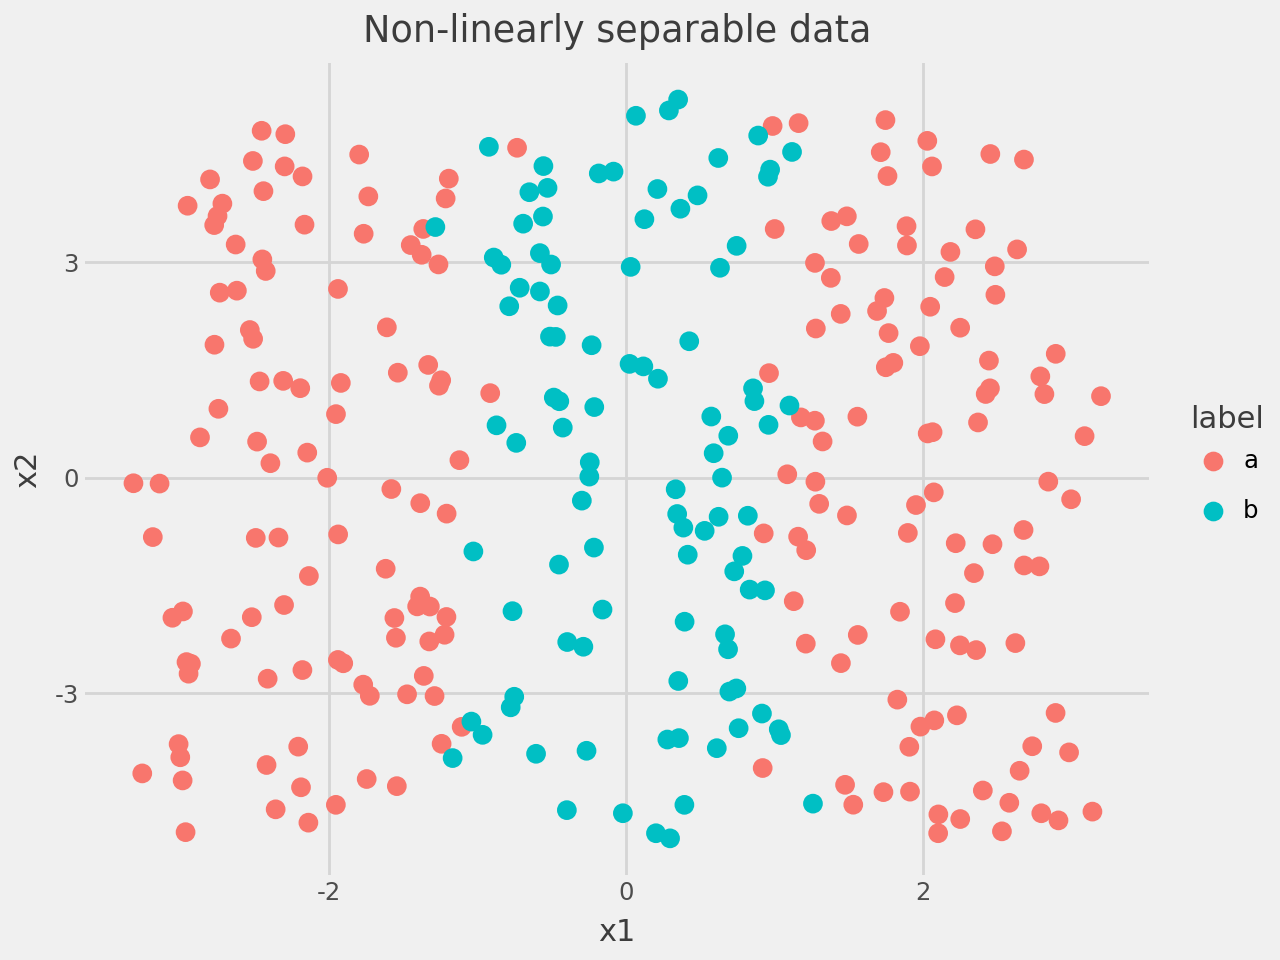

In [37]:
d = pd.read_csv("svm_example_rbf.csv")
print(d.head())
(
    ggplot(d,aes("x1","x2",color="label"))+
    geom_point(size=3)+
    theme_538()+
    labs(title="Non-linearly separable data")
)

In [38]:
# mapping the labels to 0 and 1
d['label'] = d['label'].map({'a':0,'b':1})

# preparing X and y data
X = d[['x1','x2']]
y = d['label']

In [39]:
# implementing RBF SVM on this dataset using Pipelines

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# with Pipelines, we can create sequences of modeling steps that are combined into one object

pipe = Pipeline([
    ('scaler',StandardScaler()), # as step 1, standard scale the data
    ('svm',SVC(kernel='rbf',gamma=0.1,C=1)) # as step 2, fit the SVM model
])

# fit model to data
# note that we use pipe here, not the svm object, so data is scaled first then fit to SVM
pipe.fit(X_train,y_train)


# predict model
# here too, we use pipe to predict, so data is scaled first then predicted
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# evaluate predictions
print("Train Accuracy:",accuracy_score(y_train,y_train_pred))
print("Test Accuracy:",accuracy_score(y_test,y_test_pred))

roc_auc = roc_auc_score(y_test,y_test_pred)
print("Test ROC AUC:",roc_auc)

Train Accuracy: 0.9
Test Accuracy: 0.9
Test ROC AUC: 0.8636363636363636


Pipelines also allows to extract models from within a Pipeline object. In this case, we have 2 model objects inside pipe: (1) the Standard Scaler object and (2) the SVM model object

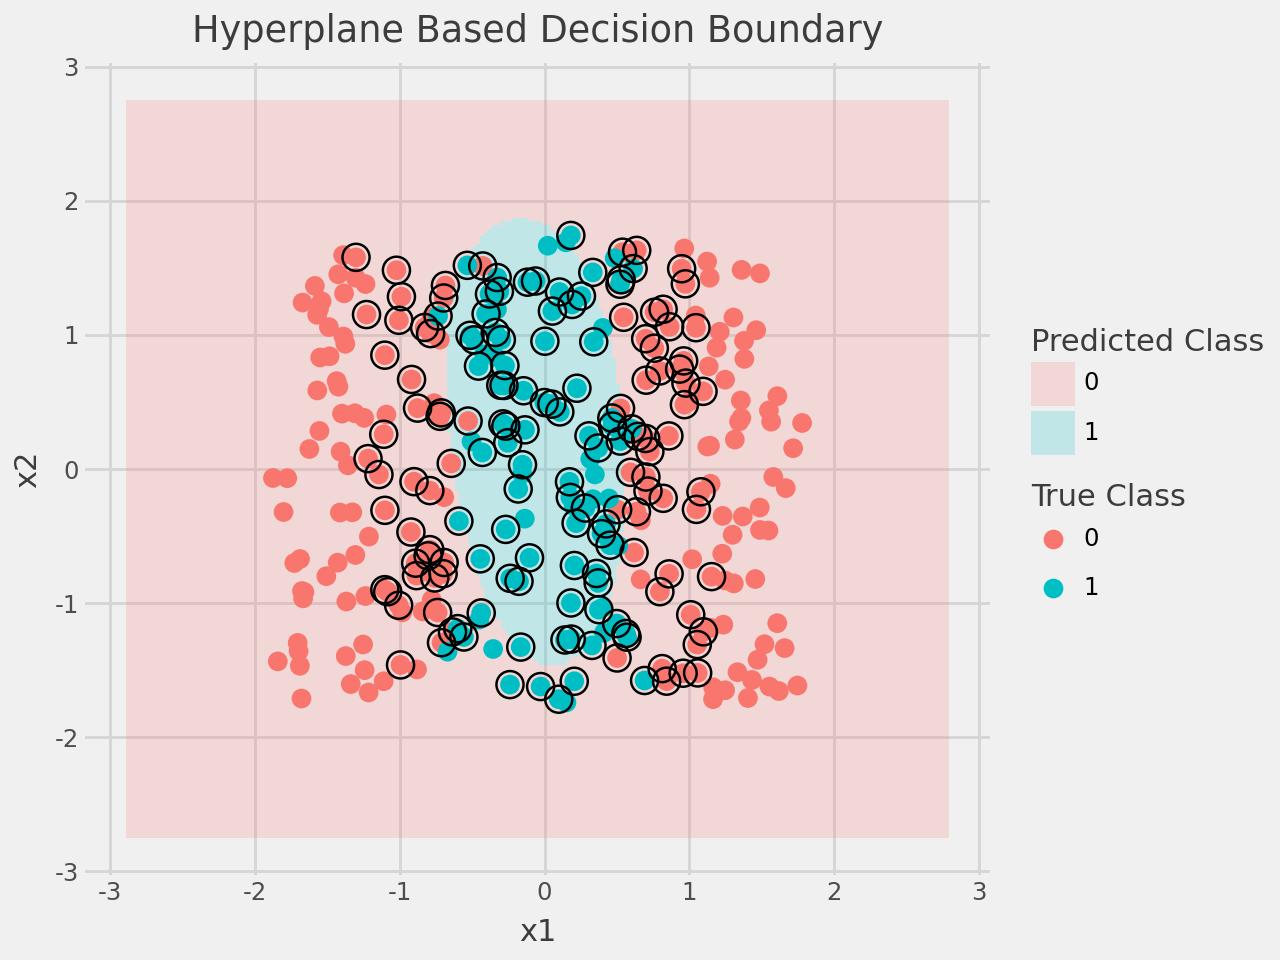

In [40]:
# use scaler within pipe to transform data
X_scaled = pipe.named_steps['scaler'].transform(X)

# extract the SVM model from the pipeline for visualization
svm = pipe.named_steps['svm']

# extra step to rebuild d data frame with scaled X and original labels, just for visualiztion
d = pd.DataFrame(X_scaled,columns=['x1','x2'])
d['label'] = y.values

# visualize model
show_hyperplane(svm,X_scaled,d)

We can also use GridSearch Cross Validation with Pipelines. GridSearchCV automatically finds the best hyperparameters for our models. 

In [57]:
# load data from previous example
d = pd.read_csv("svm_example_rbf.csv")

# map labels to 0 and 1 (not always necessary)
d['label'] = d['label'].map({'a':0,'b':1})

X = d[['x1','x2']]
y = d['label']

# split for train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# initialize Pipeline object with standard scaler and SVM model
pipe = Pipeline([
    ('scaler',StandardScaler()), # as step 1, standard scale the data
    ('svm',SVC()) # as step 2, fit the SVM model
])


We know here that are fitting an SVM so we use specific hyperparameters to grid search. Note that we use step name 'svm' followed by double underscore before the hyperparameter name. This is how we tell GridSearchCV which is the model and what are its hyperparameters to tune. 

In [68]:

# initialize hyperparameters for tuning
param_grid = {
    'svm__kernel': ['rbf'], # we will only use rbf kernel here
    'svm__C': [0.01, 0.1, 1, 10, 100], # try different values of C
    'svm__gamma': [0.01, 0.1, 1, 10, 100] # try different values of gamma
}

# initialize GridSearchCV object with 5-fold cross validation
grid_search_svm = GridSearchCV(pipe, param_grid, cv=5)

# fit model to data
grid_search_svm.fit(X_train, y_train)

# extract best model from grid search
best_svm = grid_search_svm.best_estimator_.named_steps['svm']
print("Best Hyperparameters:", grid_search_svm.best_params_) # shows the best hyperparameters learned

# evaluate model

# you can also directly use grid_search_svm to predict, similar to using pipe
y_train_pred = grid_search_svm.predict(X_train)
y_test_pred = grid_search_svm.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,y_train_pred))
print("Test Accuracy:",accuracy_score(y_test,y_test_pred))

# confusion matrix for test set 
# [[TN, FP]]
# [[FN, TP]]
cm = confusion_matrix(y_test,y_test_pred)
print("\nConfusion Matrix:\n",cm)


y_test_pred = grid_search_svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_test_pred)
print("\nTest ROC AUC:",roc_auc)



Best Hyperparameters: {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train Accuracy: 0.9583333333333334
Test Accuracy: 0.9833333333333333

Confusion Matrix:
 [[38  0]
 [ 1 21]]

Test ROC AUC: 0.9988038277511962
